In [81]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
ticker = "^BVSP"
start = "2021-01-01"
end = "2022-02-11"

In [83]:
dataframe = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [84]:
dataframe.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,119024.0,120354.0,118062.0,118558.0,118558.0,8741400
2021-01-05,118835.0,119790.0,116756.0,119223.0,119223.0,9257100
2021-01-06,119377.0,120924.0,118917.0,119851.0,119851.0,11638200
2021-01-07,119103.0,121983.0,119101.0,121956.0,121956.0,11774800
2021-01-08,122387.0,125324.0,122386.0,125077.0,125077.0,11085800
2021-01-11,125075.0,125075.0,122506.0,122807.0,122807.0,9537600
2021-01-12,123255.0,124584.0,123227.0,123998.0,123998.0,8949000
2021-01-13,123996.0,124032.0,121016.0,122040.0,122040.0,10291500
2021-01-14,121947.0,123896.0,121947.0,123481.0,123481.0,8974400


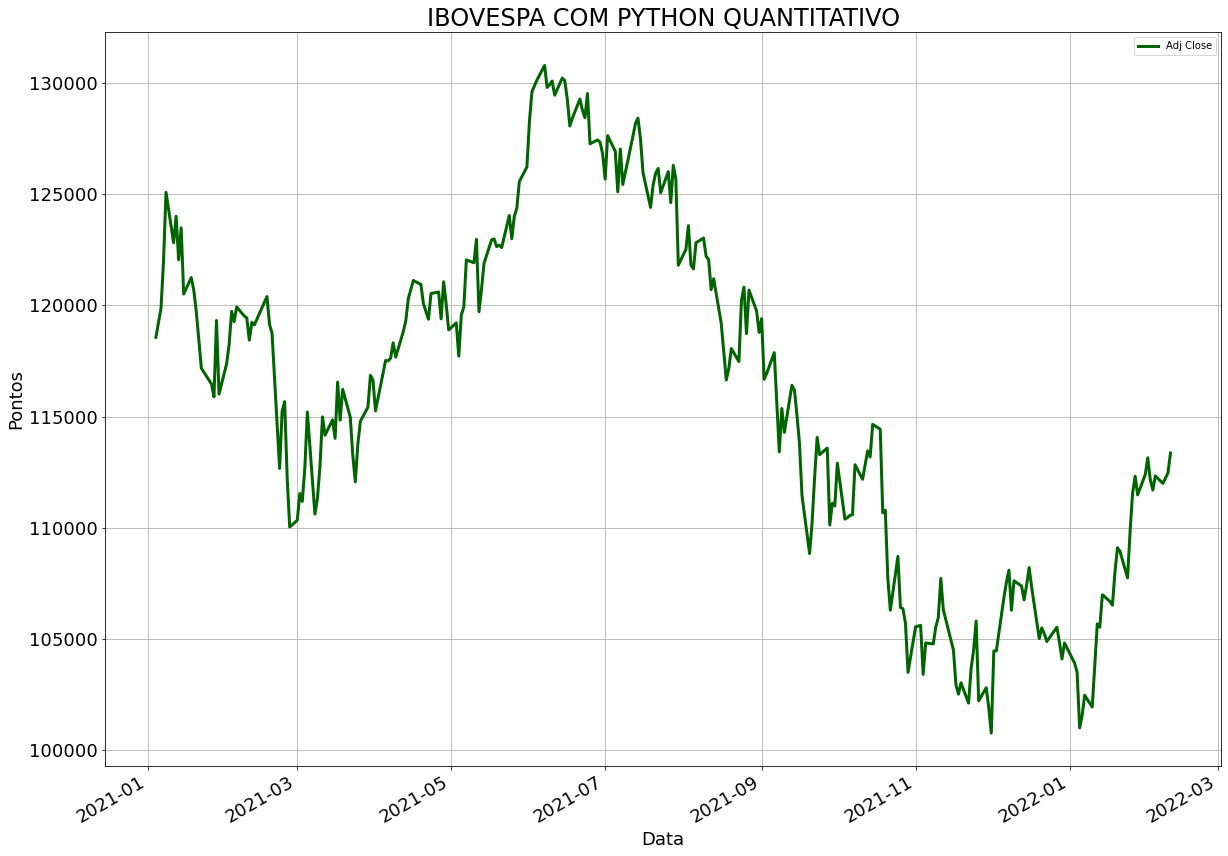

In [85]:
dataframe['Adj Close'].plot(
    grid = True, 
    figsize=(20,15), 
    linewidth = 3, 
    fontsize = 18, 
    color = 'darkgreen'
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()

In [86]:
period = 21
dispersion = 2

dataframe['desvio'] = dataframe['Adj Close'].rolling(period).std()
dataframe['MM'] = dataframe['Adj Close'].rolling(period).mean()
dataframe['Banda_Superior'] = dataframe['MM'] + (dataframe['desvio'] * dispersion)
dataframe['Banda_Inferior'] = dataframe['MM'] - (dataframe['desvio'] * dispersion)

In [87]:
dataframe = dataframe.dropna(axis = 0)

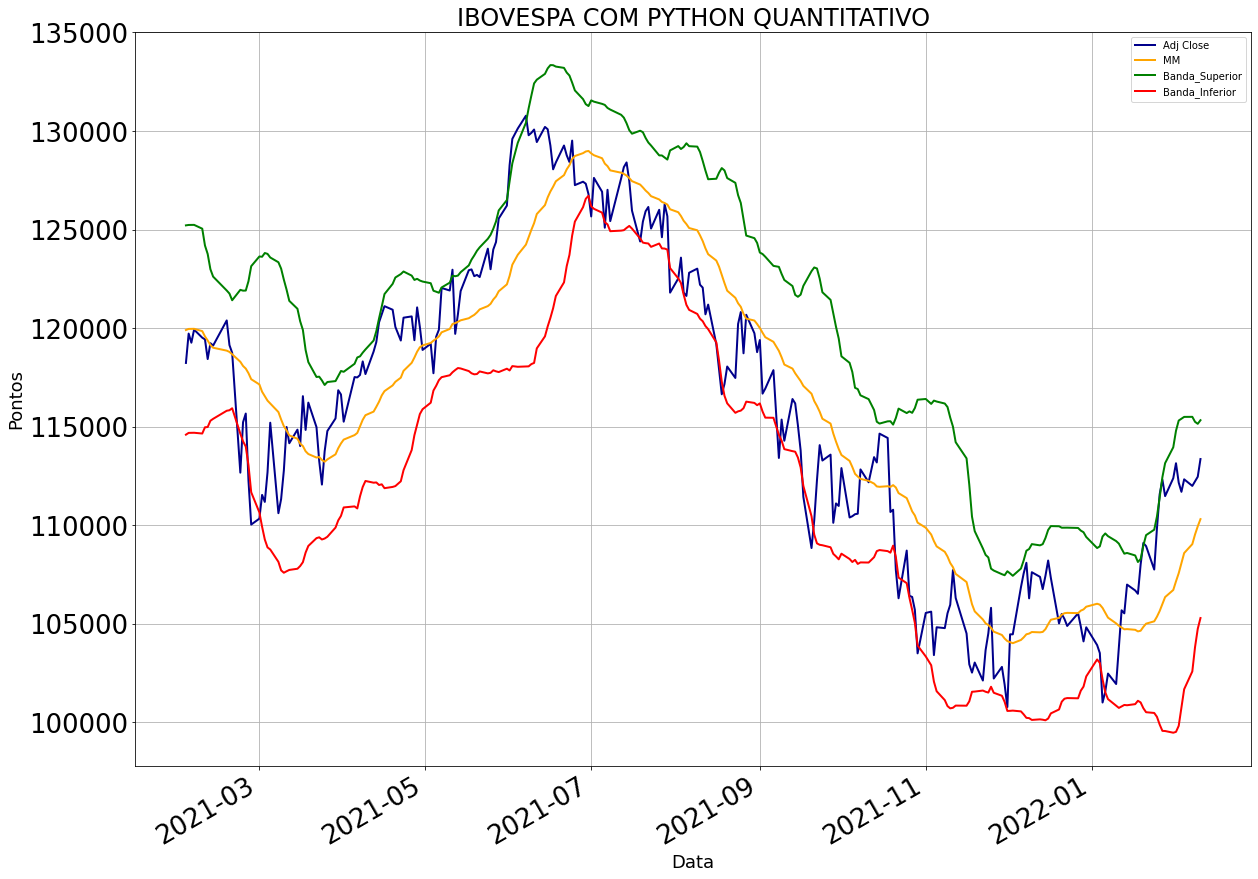

In [88]:
dataframe[['Adj Close', 'MM', 'Banda_Superior', 'Banda_Inferior']].plot(
    grid = True,
    figsize = (20, 15),
    linewidth = 2,
    fontsize = 26,
    color = ['darkblue', 'orange', 'green', 'red']  
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()

In [89]:
# CRIANDO ALVOS

period = 12
dataframe.loc[:, 'Retorno'] = dataframe['Adj Close'].pct_change(period)
dataframe.loc[:, 'Alvo'] = dataframe['Retorno'].shift( - period)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [90]:
# OLHANDO O INICIO E O FIM DO DATASET

dataframe.head()
dataframe.tail()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,Banda_Superior,Banda_Inferior,Retorno,Alvo
Date,,,,,,,,,,,,
2022-02-04,111696.0,112344.0,110321.0,112330.0,112330.0,0,3454.035196,108588.666667,115496.737058,101680.596275,0.039967,NaN
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800,3229.060823,109042.000000,115500.121646,102583.878354,0.026526,NaN
2022-02-08,111995.0,112251.0,110943.0,112234.0,112234.0,10157500,2857.595239,109531.952381,115247.142858,103816.761904,0.030218,NaN
2022-02-09,112233.0,113163.0,111710.0,112461.0,112461.0,13794500,2600.100796,109945.380952,115145.582544,104745.179361,0.043702,NaN
2022-02-10,112462.0,113812.0,112163.0,113359.0,113359.0,13267900,2509.157068,110310.761905,115329.076040,105292.447769,0.031991,NaN


In [91]:
dataframe = dataframe.dropna(axis = 0)

In [92]:
# ESTRATEGIA DO TRADE - 'Seguir a tentencia'

dataframe.loc[:, 'Regra'] = np.where(
    dataframe.loc[:, 'Adj Close'] > dataframe.loc[: , 'Banda_Superior'], 1, 0
)
dataframe.loc[:, 'Regra'] = np.where(
    dataframe.loc[:, 'Adj Close'] < dataframe.loc[: , 'Banda_Inferior'], -1, dataframe.loc[: ,'Regra']
)

In [93]:
# REGRA NO ALVO

dataframe.loc[:, 'Trade'] = dataframe.loc[:, 'Regra'] * dataframe.loc[:, 'Alvo']

In [94]:
# CALCULANDO RESULTADO ACUMULADO POR JUROS COMPOSTOS

dataframe.loc[:, 'Retorno_Trade'] = dataframe['Trade'].cumsum()

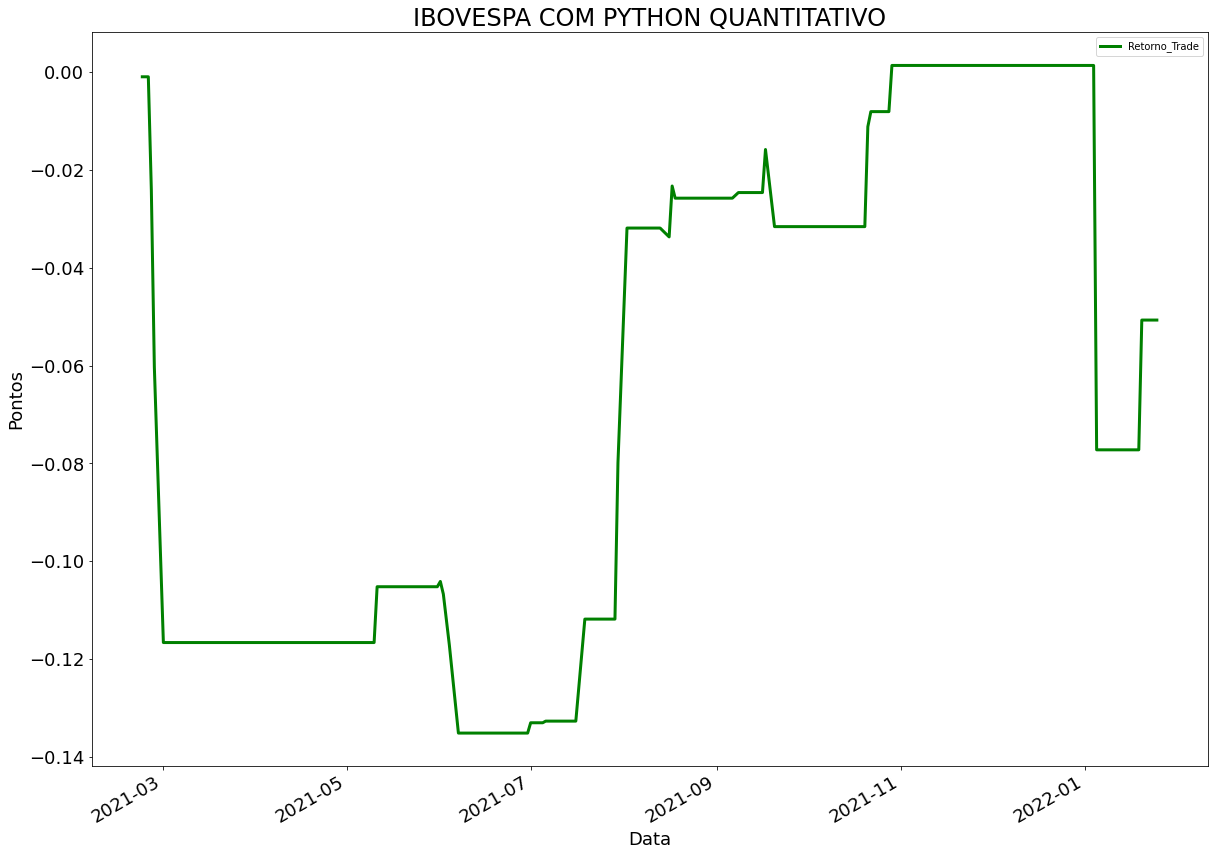

In [95]:
dataframe['Retorno_Trade'].plot(
    figsize = (20,15),
    linewidth = 3,
    fontsize = 18,
    color = 'green'
)
plt.xlabel(
    'Data',
    fontsize = 18    
)
plt.ylabel(
    'Pontos',
    fontsize = 18    
)
plt.title(
    'IBOVESPA COM PYTHON QUANTITATIVO',
    fontsize = 24    
);
plt.legend()